Author: Elizabeth Luong 

Date: Jan 15, 2025

Q1: What proportion of students who answer this question quickly will pass the class? Assume the probability of passing the class is 0.9. Assume the probability of answering this question quickly is 0.6 if you'll pass the class, while the probability drops to 0.3 if you'll not pass the class.

A1: Using the formula for Bayes' Theorem, we have:

$$
P(\text{pass | quick}) = \frac{P(\text{quick | pass}) \cdot P(\text{pass})}{P(\text{quick})}
$$

Given from the question, we know:
- $P(\text{pass}) = 0.9$
- $P(\text{quick | pass}) = 0.6$  
- $P(\text{quick | fail}) = 0.3$  
- $P(\text{fail}) = 1 - P(\text{pass}) = 0.1$

Using the Law of Total Probability, we calculate $(P(\text{quick}))$:

$$
P(\text{quick}) = P(\text{quick | pass}) \cdot P(\text{pass}) + P(\text{quick | fail}) \cdot P(\text{fail})
$$

Substituting the values:

$$
P(\text{quick}) = (0.6)(0.9) + (0.3)(0.1) = 0.54 + 0.03 = 0.57
$$

Substituting into Bayes' Theorem:

$$
P(\text{pass | quick}) = \frac{(0.6) \cdot (0.9)}{0.57} \approx 0.9474
$$

The proportion of students who answer the question quickly and pass the class is approximately **94.73%**.


Q2: 
\begin{align*}
\text{Likelihood} && p(x|\theta, n) &={} \texttt{Multinomial} \\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet} \\\\
\text{Posterior} && p(\theta|x, n, \boldsymbol{\alpha}) &={} 
\overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?} \\\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?} \\\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?} \\\\
\end{align*}

### The posterior is always proportional to the joint

$$\large p(\theta|x) = (1/c)\times p(\theta, x) \propto{} p(\theta, x)$$

**and the posterior is always a proper distribution if the prior is.**


A2:  
\begin{align*}
\text{Likelihood} && p(\mathbf{x}|\boldsymbol{\theta}, n) &={} \frac{n!}{x_1! x_2! \cdots x_k!} \prod_{i=1}^k \theta_i^{x_i} \quad \text{(Multinomial)} \\\\
\text{Prior} && p(\boldsymbol{\theta}|\boldsymbol{\alpha}) &={} \frac{\Gamma\left(\sum_{i=1}^k \alpha_i\right)}{\prod_{i=1}^k \Gamma(\alpha_i)} \prod_{i=1}^k \theta_i^{\alpha_i - 1} \quad \text{(Dirichlet)} \\\\
\text{Posterior} && p(\boldsymbol{\theta}|\mathbf{x}, n, \boldsymbol{\alpha}) &={} 
\overset{\text{Bayes Theorem}}{\frac{p(\mathbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{p(\mathbf{x})}} \\\\
&&& \quad\quad = \prod_{i=1}^k \theta_i^{x_i} \cdot \prod_{i=1}^k \theta_i^{\alpha_i - 1} \quad \text{(Plug in Likelihood and Prior)} \\\\
&&& \quad\quad = \prod_{i=1}^k \theta_i^{x_i + \alpha_i - 1} \quad \text{(Combine Exponents)} \\\\
&&& \quad\quad\quad\quad\quad\; = \; \text{Dirichlet Distribution} \\\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \text{With parameterization:} \; \boldsymbol{\alpha}^* = (\alpha_1 + x_1, \alpha_2 + x_2, \ldots, \alpha_k + x_k) \\\\
\end{align*}

The posterior is always proportional to the joint

$$ p(\boldsymbol{\theta}|\mathbf{x}) = (1/c)\times p(\boldsymbol{\theta}, \mathbf{x}) \propto{} p(\boldsymbol{\theta}, \mathbf{x})$$

and the posterior is always a proper distribution if the prior is. 


Q3: Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.


In [3]:
!pip install plotly

In [4]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import multinomial, dirichlet

In [7]:
# Multinomial parameters
theta = [0.5, 0.3, 0.2]
n_trials = 100

# Generate a single multinomial sample
sample = multinomial.rvs(n_trials, theta, size=1)[0]
print("Multinomial Sample:", sample)

Multinomial Sample: [54 25 21]


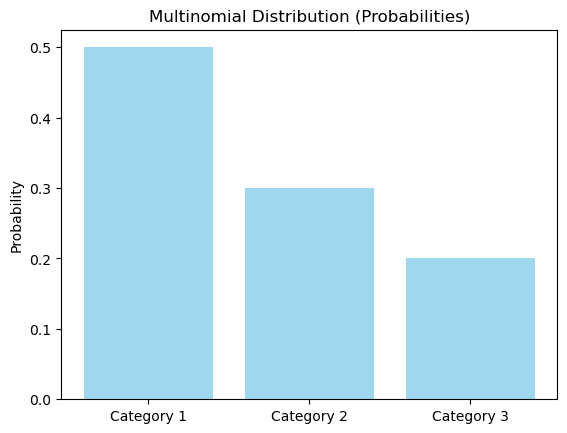

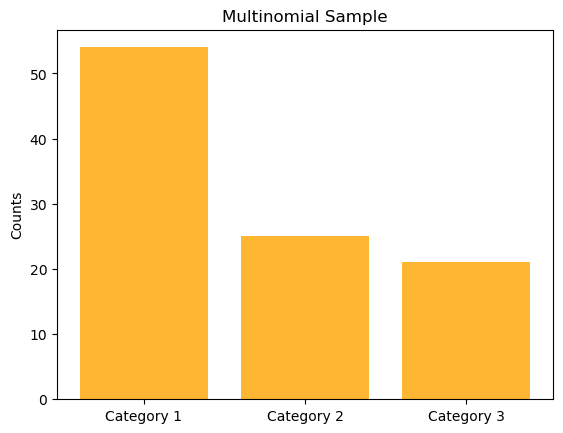

In [11]:
# Visualize multinomial probabilities
categories = ["Category 1", "Category 2", "Category 3"]
plt.bar(categories, theta, color='skyblue', alpha=0.8)
plt.title("Multinomial Distribution (Probabilities)")
plt.ylabel("Probability")
plt.show("png")

# Visualize multinomial sample
plt.bar(categories, sample, color='orange', alpha=0.8)
plt.title("Multinomial Sample")
plt.ylabel("Counts")
plt.show("png")

In [12]:
# Dirichlet parameters
alpha_prior = np.array([2, 2, 2])
alpha_posterior = alpha_prior + sample

# Generate samples for prior and posterior
prior_samples = dirichlet.rvs(alpha_prior, size=500)
posterior_samples = dirichlet.rvs(alpha_posterior, size=500)

# Create DataFrames for plotly
import pandas as pd
df_prior = pd.DataFrame(prior_samples, columns=["Category 1", "Category 2", "Category 3"])
df_posterior = pd.DataFrame(posterior_samples, columns=["Category 1", "Category 2", "Category 3"])

In [15]:
# Plot Dirichlet prior
fig_prior = px.scatter_ternary(df_prior, a="Category 1", b="Category 2", c="Category 3",
                                title="Dirichlet Prior",
                                opacity=0.5)
fig_prior.show()

# Plot Dirichlet posterior
fig_posterior = px.scatter_ternary(df_posterior, a="Category 1", b="Category 2", c="Category 3",
                                   title="Dirichlet Posterior",
                                   opacity=0.5)
fig_posterior.show()